In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
#for reproducability
set.seed(1)

#demonstrate the dataset can be read from the web into R
caffeine <-read_csv("caffeine.csv")

#changing column names
colnames(caffeine) <- make.names(colnames(caffeine))

#creating the factor and selecting variables needed for prediction
caffeine_selected <- caffeine %>%
        mutate(type = as_factor(type)) %>%
        select(Calories, Caffeine..mg., type)

Parsed with column specification:
cols(
  drink = col_character(),
  `Volume (ml)` = col_double(),
  Calories = col_double(),
  `Caffeine (mg)` = col_double(),
  type = col_character()
)



In [ ]:
#creating a training set and splitting the data into 75% training, and 25% testing
caffeine_split <- initial_split(caffeine_selected, prop = 0.75, strata = type)
caffeine_train <- training(caffeine_split)
caffeine_test <- testing(caffeine_split)

caffeine_test

#creating classification K nearest neighbours
knn_spec <- nearest_neighbor(weight_func= "rectangular", neighbors = tune()) %>%
    set_engine ("kknn") %>%
    set_mode("classification")

#standardizing data
caffeine_recipe <- recipe(type ~ ., data = data) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

#creating folds within training set
caffeine_vfold <- vfold_cv(caffeine_train, v = 5, strata = type)

#creating workflow
knn_results <- workflow() %>%
  add_recipe(caffeine_recipe) %>%
  add_model(knn_spec) %>%
  tunegrid(resamples = caffeine_vfold, grid = 10) %>%
  collect_metrics()

#checking the accuracy from the workflow
accuracies <- knn_results %>%
  filter(.metric == "accuracy")

accuracies


Calories,Caffeine..mg.,type
<dbl>,<dbl>,<fct>
204,140,Coffee
429,160,Coffee
160,120,Coffee
3,279,Coffee
0,77,Coffee
10,40,Coffee
470,234,Coffee
20,297,Coffee
100,166,Coffee


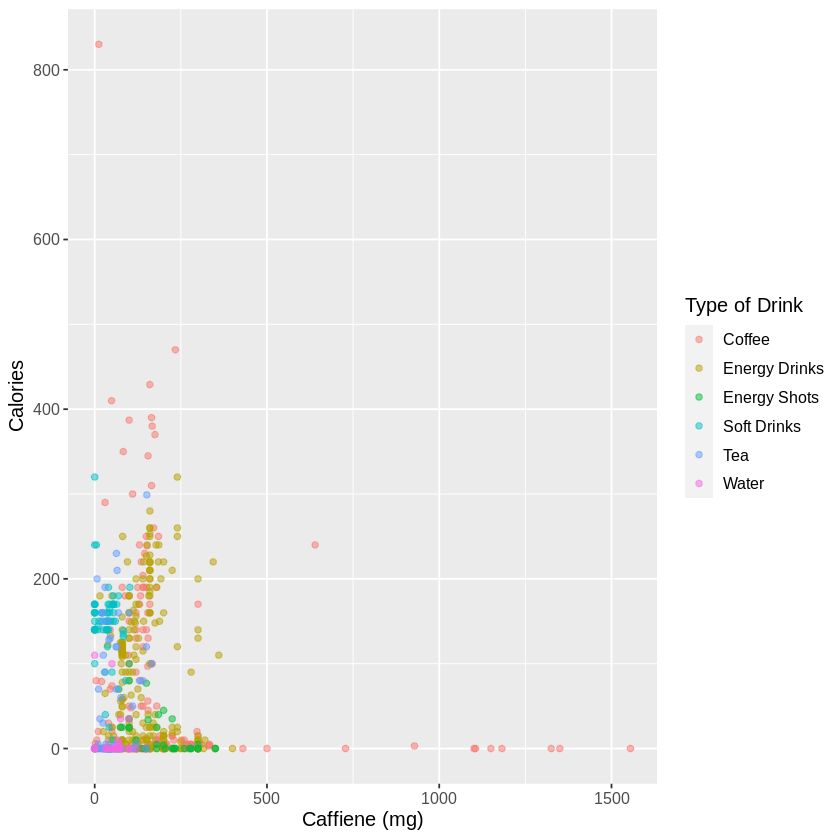

In [3]:
#creating scatter plot for caffiene and volume
caffiene_plot = caffeine %>%
    ggplot(aes(x = Caffeine..mg., y = Calories, color = type)) +
    geom_point(alpha = 0.5) +
    labs(x = "Caffiene (mg)", y="Calories",color = "Type of Drink") +
    theme(text = element_text(size = 12))

caffiene_plot